In [144]:
#Loading dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist

digits= mnist.load_data()
(train_image,train_label),(test_image,test_label) = mnist.load_data()


In [145]:
#Training images & labels shape

print(f"training images shape",train_image.shape)
print(f"training labels length",len(train_label))
print(f"training labels",train_label)

#Testing images & labels shape
print(f"test images shape",test_image.shape)
print(f"test labels length",len(test_label))
print(f"test labels",train_label)
print(type(train_image))

training images shape (60000, 28, 28)
training labels length 60000
training labels [5 0 4 ... 5 6 8]
test images shape (10000, 28, 28)
test labels length 10000
test labels [5 0 4 ... 5 6 8]
<class 'numpy.ndarray'>


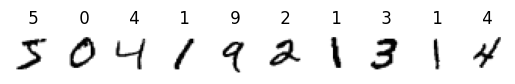

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=10)
counter = 0  # Use a counter for train_image and train_label

for ax in axes:
    ax.axis('off')
    ax.imshow(train_image[counter], cmap=plt.cm.gray_r)
    ax.set_title(' %i' % train_label[counter])
    counter += 1

In [147]:
#Reshaping
train_image = train_image.reshape(60000, 28*28)
train_label = train_label.astype('float32')/255
test_image = test_image.reshape(10000, 28*28)
test_label = test_label.astype('float32') / 255

print(test_image.shape)


(10000, 784)


In [148]:
#Building a NN model
from keras import models
from keras import layers


#Network artitechture

network = models.Sequential()


network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
# network.add(layers.Dense(256,activation='relu')) you can more dense layers in your network
network.add(layers.Dense(10, activation='softmax'))

#Compilation
network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

#Training
network.fit(train_image, train_label, epochs= 5, batch_size=128, verbose=0) # verbose=0 doesn't print epoch on screen while training

test_loss, test_accuracy = network.evaluate(test_image, test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0980


In [149]:
#Evaluate
test_loss, test_accuracy = network.evaluate(test_image, test_label)
print(f"test_acc,test_loss: {test_accuracy}, {test_loss}")

Train_loss, Trian_accuracy = network.evaluate(train_image, train_label) 
print(f"training_acc,training_loss: {Trian_accuracy}, {Train_loss}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0980
test_acc,test_loss: 0.09799999743700027, 0.0
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0987
training_acc,training_loss: 0.09871666878461838, 0.0


In [150]:
print(test_image.shape)

(10000, 784)


In [152]:
# Check prediction
digit_pred = network.predict(test_image)
np.argmax(digit_pred[0])
print(test_label[0])

predicted_class = np.argmax(digit_pred[0])
print(f'Predicted Class: {predicted_class}')
print(f'Actual Class: {test_label[0]}')

313/313 [==============================] - 1s 2ms/step
0.02745098
Predicted Class: 0
Actual Class: 0.027450980618596077


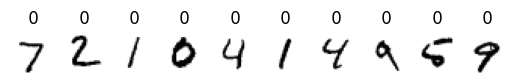

In [153]:
#Reverting Shape
test_image = test_image.reshape(10000, 28,28)
#test_label = test_label.astype('float32')

#Display images
fig, axes = plt.subplots(nrows=1, ncols=10)
counter = 0 

for ax in axes:
    ax.axis('off')
    ax.imshow(test_image[counter], cmap=plt.cm.gray_r)
    ax.set_title(' %i' % test_label[counter])
    counter += 1